In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from scipy.stats import iqr
import scipy.stats as stat
from matplotlib import pylab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
data.isnull().sum().sum()

6965

In [ ]:
data.duplicated().sum()

0

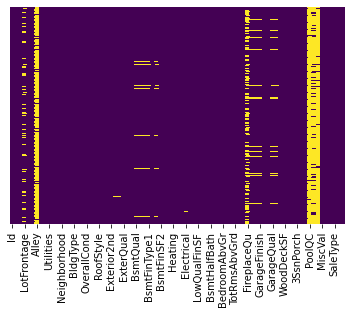

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.drop(['Condition1','Condition2','BldgType','HouseStyle','RoofMatl','Exterior1st'], axis = 1,inplace=True)

In [ ]:
data.shape

(1460, 75)

In [ ]:
 data.fillna(data.mean(),inplace=True)

In [ ]:
data.isnull().sum().sum()

6617

In [ ]:
 data.fillna(data.mode(),inplace=True)

In [ ]:
data.isnull().sum().sum()

6612

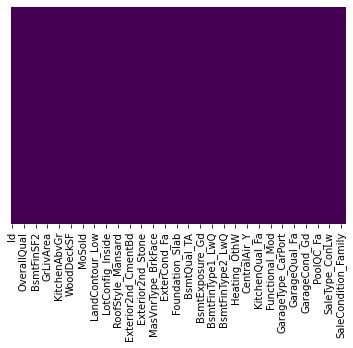

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
data.drop(['MiscVal','MSZoning','Street','Fence','FireplaceQu'], axis = 1,inplace=True)

In [ ]:
data.isnull().sum().sum()

4745

In [ ]:
data.GarageType.isnull().sum().sum()

81

In [ ]:
data.fillna(data['GarageType'].mode()[0],inplace=True)

In [ ]:
data.GarageType.isnull().sum().sum()

0

In [ ]:
data.drop('MiscFeature',inplace=True,axis=1)

In [ ]:
pd.notnull(data).sum()

Id               1460
MSSubClass       1460
LotFrontage      1460
LotArea          1460
Alley            1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 69, dtype: int64

In [ ]:
pd.notna(data).sum()

Id               1460
MSSubClass       1460
LotFrontage      1460
LotArea          1460
Alley            1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 69, dtype: int64

In [ ]:
data.all().sum()

47

In [ ]:
data.Functional.str.upper()

0        TYP
1        TYP
2        TYP
3        TYP
4        TYP
        ... 
1455     TYP
1456    MIN1
1457     TYP
1458     TYP
1459     TYP
Name: Functional, Length: 1460, dtype: object

In [ ]:
data.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [ ]:
data.isnull().mean().sort_values(ascending = True)

Id              0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
GrLivArea       0.0
BsmtFullBath    0.0
               ... 
ExterCond       0.0
ExterQual       0.0
MasVnrArea      0.0
BsmtExposure    0.0
SalePrice       0.0
Length: 69, dtype: float64

In [ ]:
data.groupby(['BsmtFinType2'])['BsmtFinType2'].count()

BsmtFinType2
ALQ         19
Attchd      38
BLQ         33
GLQ         14
LwQ         46
Rec         54
Unf       1256
Name: BsmtFinType2, dtype: int64

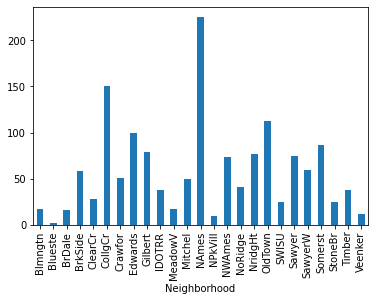

In [ ]:
data.groupby(['Neighborhood'])['Neighborhood'].count().plot.bar()

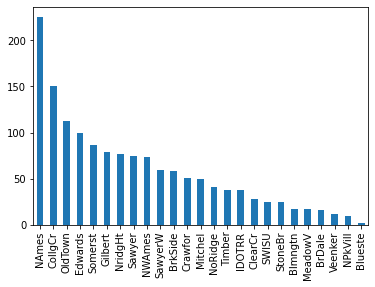

In [ ]:
data['Neighborhood'].value_counts().plot.bar()

In [ ]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
data['Neighborhood'].count()

1460

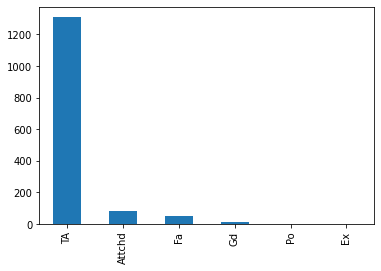

In [ ]:
data['GarageQual'].value_counts().plot.bar()

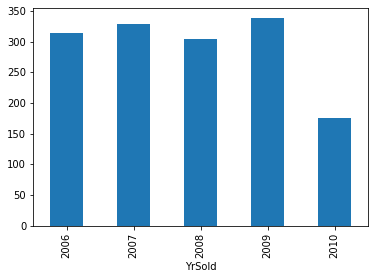

In [ ]:
data.groupby(['YrSold'])['YrSold'].count().plot.bar()

In [ ]:
int_to_float = (data.dtypes[data.dtypes!='object'])
int_to_float

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
data.corr()['LotFrontage']['SalePrice']

0.33490085154055077

**GAUSSIAN DISTRIBUTION OR NORMAL DISTRIBUTION(logarithm distribution,reciprocal logarithm,square root,exponential distribution,boxcox transformation with Q-Q plot ) if you want to check whether features are guassion or normal we can use Q-Qplot**

In [ ]:
def plot_data(data,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[features].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[features],dist='norm',plot=pylab)
  plt.show()

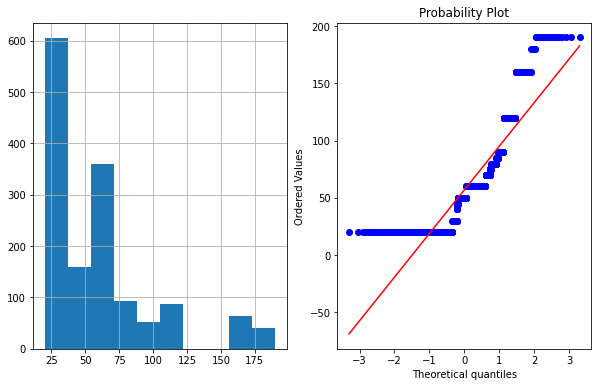

In [ ]:
plot_data(data,'MSSubClass')

**LOGRITHMIC DISTRIBUTION**   (LOG TRANSFORMATION CANT BE APPLIED TO ZERO OR NEGATIVE VALUES OR VARIABLES)

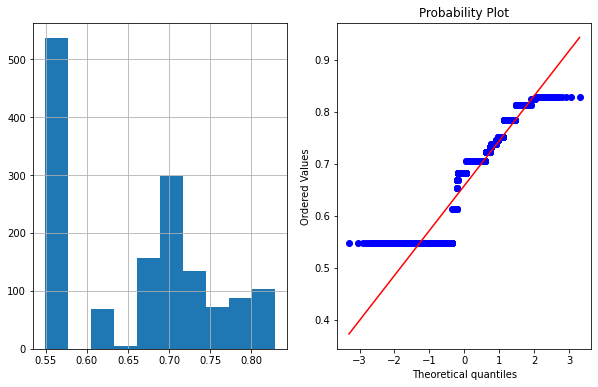

In [ ]:
data['MSSubClass']=np.log(data['MSSubClass'])
plot_data(data,'MSSubClass')

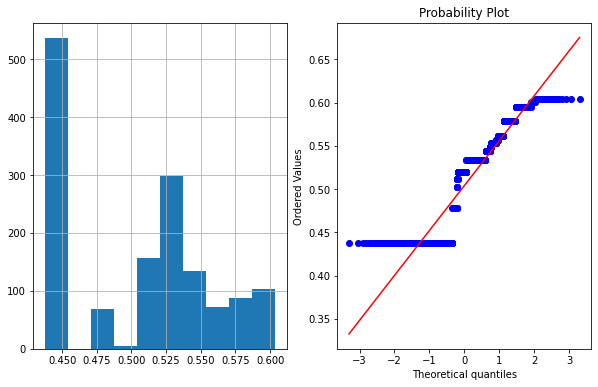

In [ ]:
data['MSSubClass']=np.log(data['MSSubClass']+1)    # METHOD2 
plot_data(data,'MSSubClass')

**RECIPROCAL DISTRIBUTION**

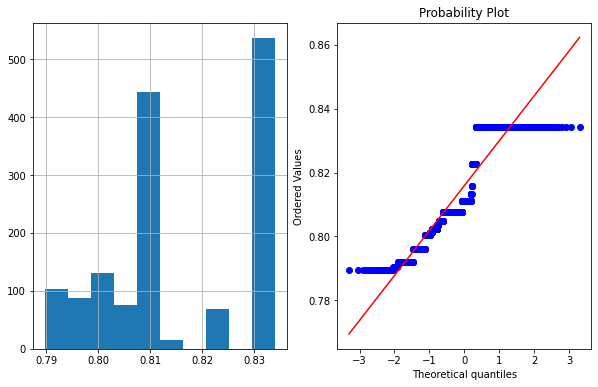

In [ ]:
data['MSSubClass']=data.MSSubClass**(1/2)
plot_data(data,'MSSubClass')

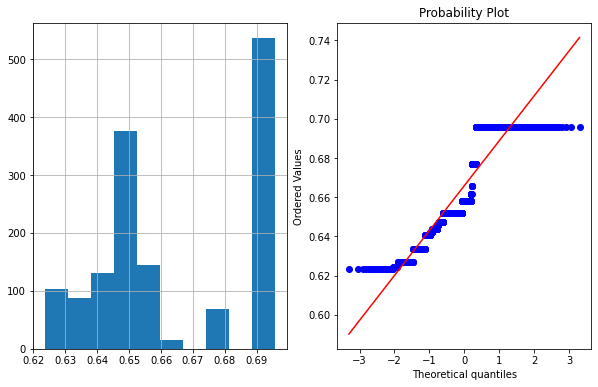

In [ ]:
data['MSSubClass']=1/(data['MSSubClass']+1)
plot_data(data,'MSSubClass')                                    # METHOD2

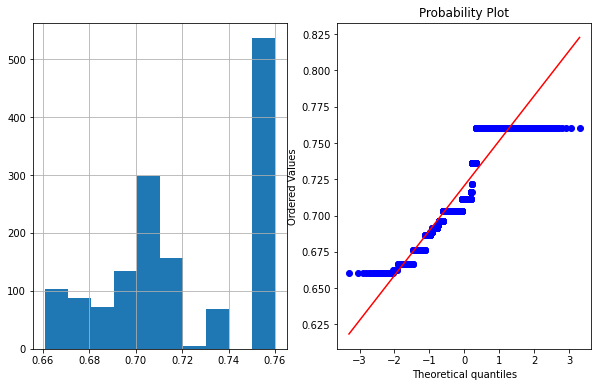

In [ ]:
data['LotFrontage']=1/data.MSSubClass**(1/2)
plot_data(data,'LotFrontage')

**SQUARE ROOT DISTRIBUTION**

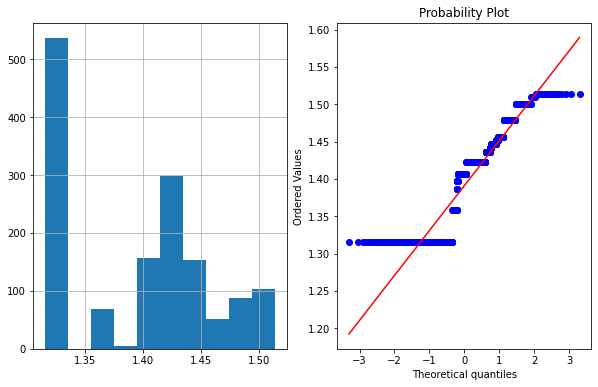

In [ ]:
data['LotShape']=data.MSSubClass**(1/2)
plot_data(data,'LotShape')

**EXPONETIAL DISTRIBUTION**

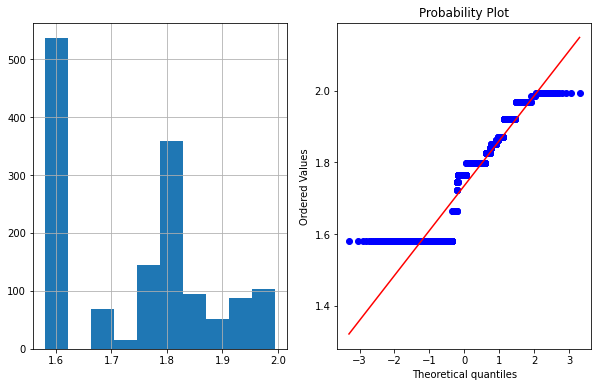

In [ ]:
data['Neighborhood']=data.MSSubClass**(1/1.2)
plot_data(data,'Neighborhood')

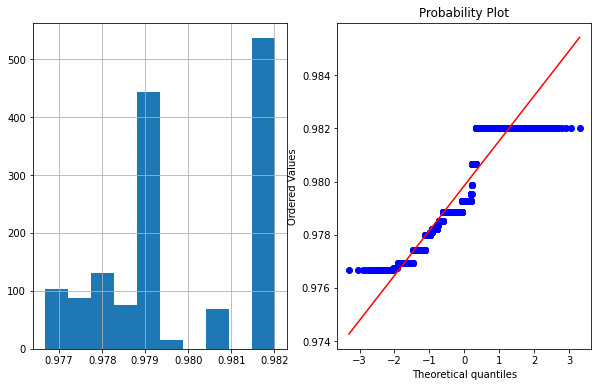

In [ ]:
data['Neighborhood']=data.MSSubClass**(1/5)           #2ND METHOD
plot_data(data,'Neighborhood')

**BOXCOX DISTRIBUTION**

In [ ]:
stat.boxcox(data['Neighborhood'])
data['Neighborhood'],parameter = stat.boxcox(data['Neighborhood'])
print(parameter)

-0.33504380606867085


In [ ]:
plot_data(data,'Neighborhood')

Obtimal Lambda :  -37.70742927086935


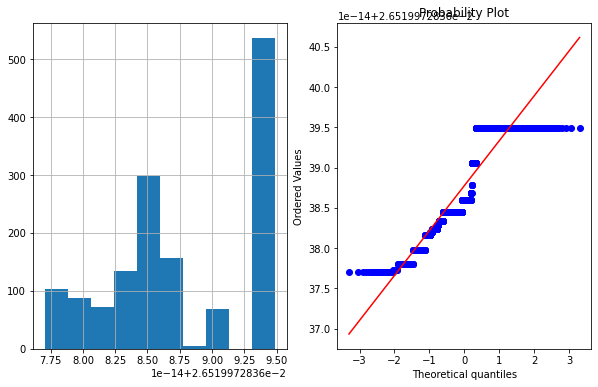

In [ ]:
data['Neighborhood'],parameter = stat.boxcox(data.Neighborhood+1)
print("Obtimal Lambda : ",parameter)                                          #2METHOD
plot_data(data,'Neighborhood')

OUTLIER HANDLING [NUMERIC COLUMN]

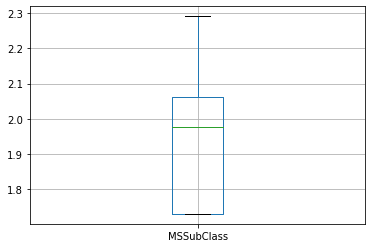

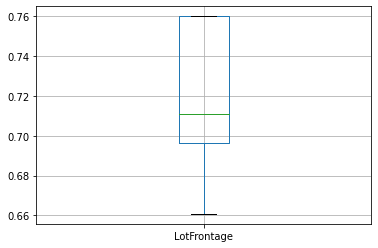

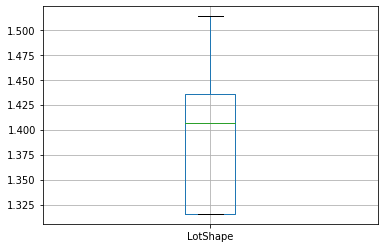

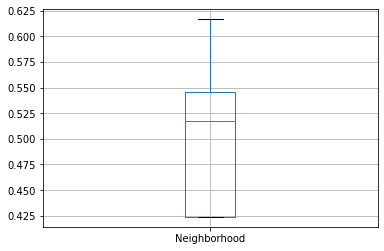

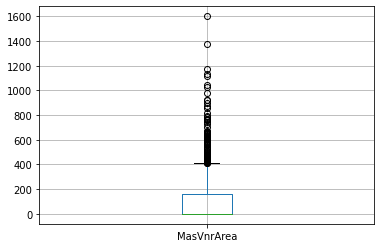

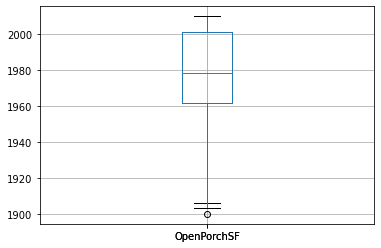

In [ ]:
float_column = data.dtypes[data.dtypes=='float64'].index
for x in float_column:
  plt.figure()
  data.boxplot([x])

UT=data[x]. quantile (.75)+iqr(data[x])*1.5
LT=data[x]. quantile (.25)-iqr(data[x])*1.5
outlier = data[x].clip(lower = LT,upper =UT)
data['OpenPorchSF'][data['OpenPorchSF']<UT]=outlier
data.boxplot('OpenPorchSF')

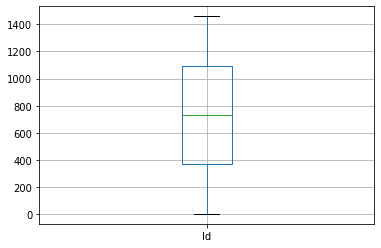

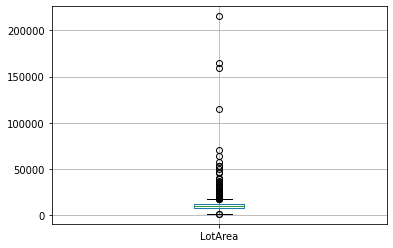

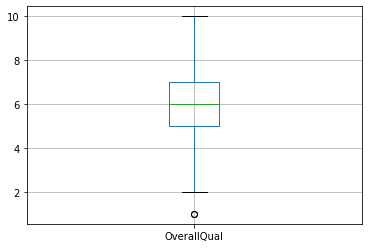

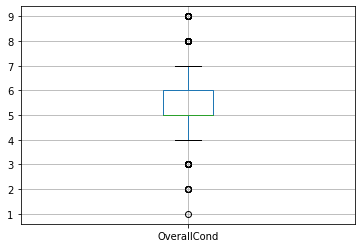

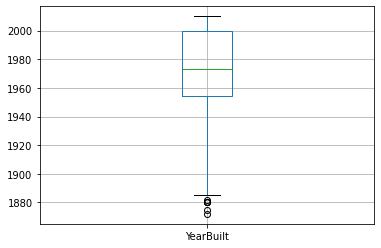

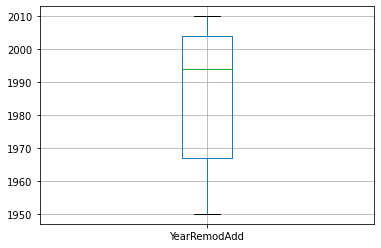

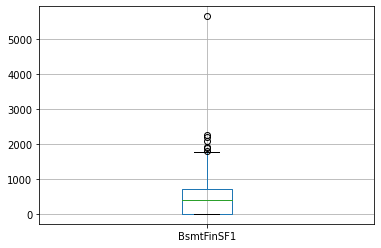

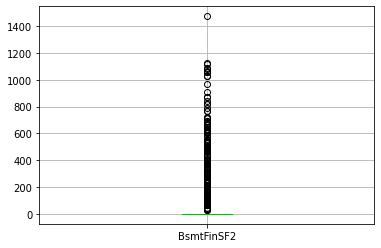

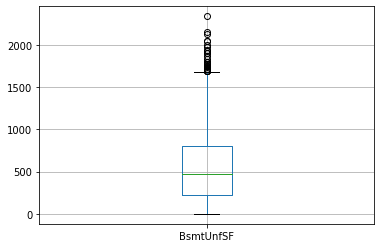

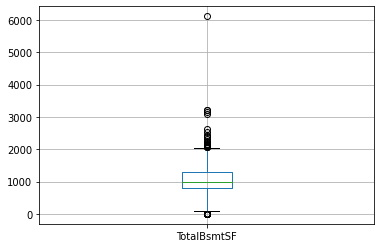

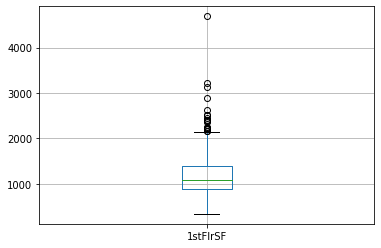

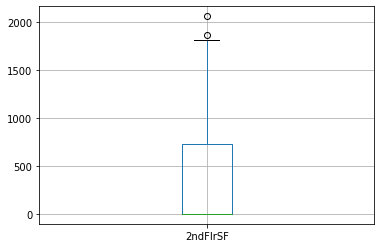

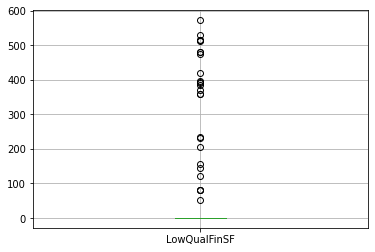

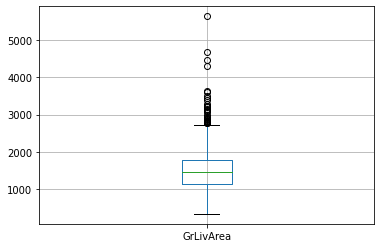

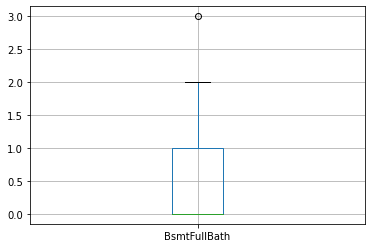

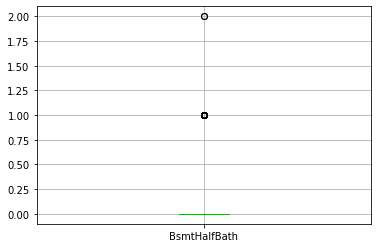

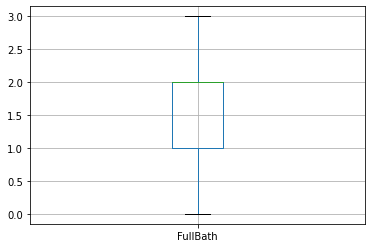

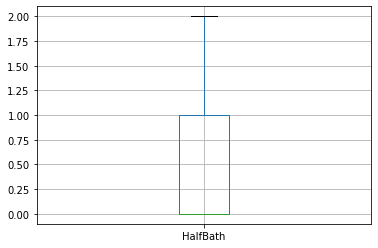

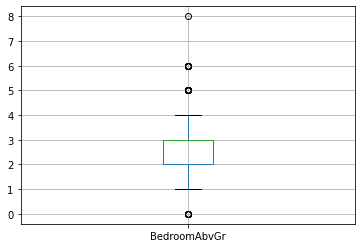

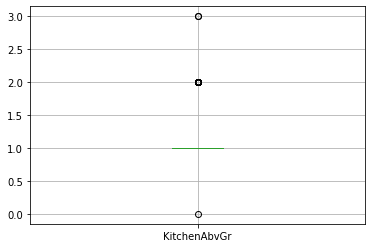

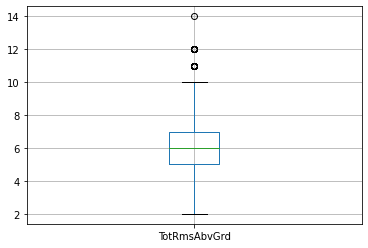

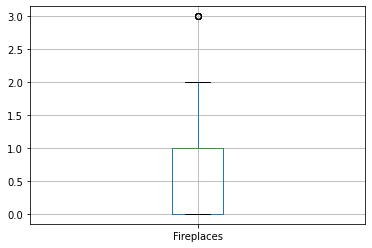

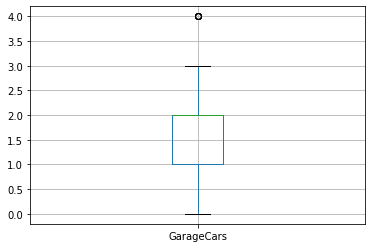

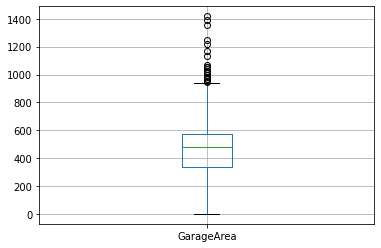

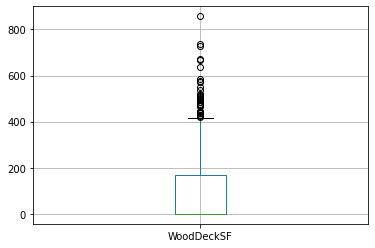

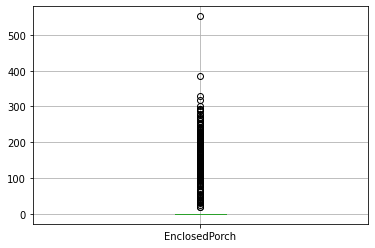

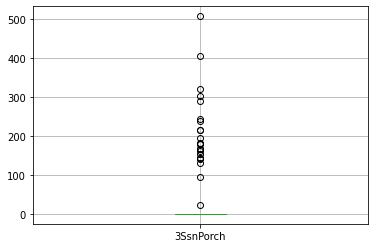

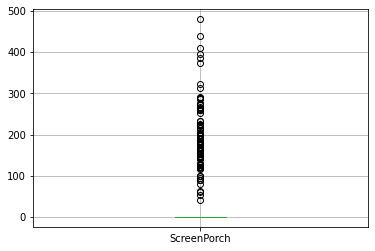

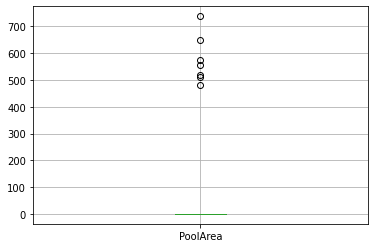

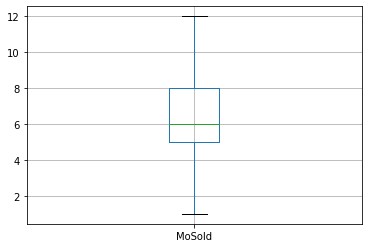

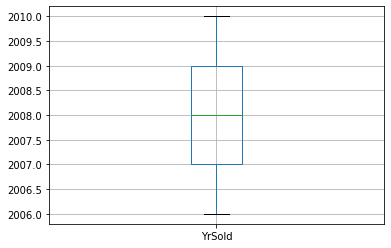

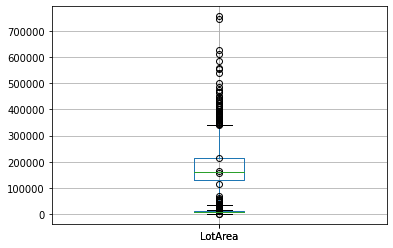

In [ ]:
int_column = data.dtypes[data.dtypes=='int64'].index
for x in int_column:
  plt.figure()
  data.boxplot([x])
UT=data[x]. quantile (.75)+iqr(data[x])*1.5
LT=data[x]. quantile (.25)-iqr(data[x])*1.5
outlier = data[x].clip(lower = LT,upper =UT)
data['LotArea'][data['LotArea']>UT]=outlier
data.boxplot('LotArea')

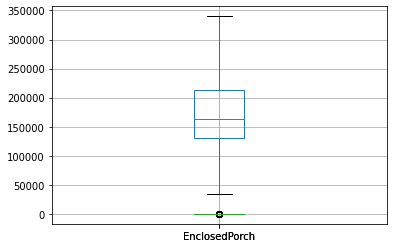

In [ ]:
data.boxplot(column='EnclosedPorch')
UT=data[x]. quantile (.75)+iqr(data[x])*1.5
LT=data[x]. quantile (.25)-iqr(data[x])*1.5
outlier = data[x].clip(lower = LT,upper =UT)
data['EnclosedPorch'][data['EnclosedPorch']<UT]=outlier
data.boxplot('EnclosedPorch')

In [ ]:
data.OpenPorchSF.isnull().sum()

0

In [ ]:
data.OpenPorchSF.dtypes

dtype('float64')

In [ ]:
data['OpenPorchSF'] = data['OpenPorchSF'].astype(float)

**BEST FEATURS SELECTION** (**1st METHOD UNIVARIATE SELECTION**)

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
x=data.iloc[:,0:72]

In [ ]:
y=data.iloc[:,-1]

In [ ]:
best_features = SelectKBest(score_func=chi2,k=70)
best_score = best_features.fit(x,y)

In [ ]:
chi2_test_result= pd.DataFrame(best_score.scores_)
data_column_x = pd.DataFrame(x.columns)

In [ ]:
data.head(1)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,Alley_Grvl,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2.023449,0.702998,8450,1.42248,0.533158,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,2003.0,208500.0,0,0,0,2,2008,208500,1,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
best_features_score = pd.concat([data_column_x,chi2_test_result],axis=1)

In [ ]:
best_features_score.columns = ['LotFrontage','MSSubClass']


In [ ]:
best_features_score

,LotFrontage,MSSubClass
0,Id,152.686075
1,MSSubClass,0.116234
2,LotFrontage,0.011569
3,LotArea,7081.377195
4,LotShape,0.021378
...,...,...
67,Exterior2nd_Stucco,0.738485
68,Exterior2nd_VinylSd,76.247624
69,Exterior2nd_Wd Sdng,16.323268
70,Exterior2nd_Wd Shng,0.528114


In [ ]:
print(best_features_score.nlargest(12,'MSSubClass'))

      LotFrontage    MSSubClass
38      SalePrice  6.308189e+06
32  EnclosedPorch  4.284374e+06
13      BsmtUnfSF  3.121530e+04
14    TotalBsmtSF  1.882735e+04
10     MasVnrArea  1.258274e+04
29     GarageArea  1.224752e+04
15       1stFlrSF  9.163033e+03
18      GrLivArea  7.083900e+03
3         LotArea  7.081377e+03
12     BsmtFinSF2  5.999203e+03
11     BsmtFinSF1  1.379960e+03
17   LowQualFinSF  7.989700e+02


**BEST FEATURS SELECTION(2ND METHOD FEATURE IMPORTANCE)**

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[1.97999849e-02 8.86206020e-03 7.68212048e-03 1.94635222e-02
 9.33344998e-03 8.33441041e-03 2.47101712e-02 5.38090888e-03
 7.91688266e-02 8.77541896e-02 1.90508461e-02 2.26830242e-02
 2.48427297e-03 2.58449097e-02 2.31129800e-02 2.23602233e-02
 9.09086571e-03 3.17204981e-04 2.33242695e-02 1.07093561e-02
 1.80379039e-03 1.32357754e-02 1.23607047e-02 1.23184301e-02
 2.18895031e-03 1.73090321e-02 9.78649108e-03 8.63325326e-02
 2.48410288e-02 2.85443838e-02 2.07394306e-02 7.13462517e-02
 3.58899881e-02 2.52090529e-03 4.33527630e-03 2.42768222e-04
 2.78421056e-02 4.93114686e-02 3.76398921e-02 1.83425499e-04
 5.41103894e-03 8.29379871e-03 8.68245006e-04 8.05149476e-03
 0.00000000e+00 3.99893477e-03 2.56041807e-03 1.41528811e-04
 1.07269868e-02 1.20171287e-03 1.17983440e-03 7.06806912e-03
 2.04696391e-05 6.71621413e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.36553638e-04 0.00000000e+00
 1.28486398e-02 2.60499397e-03 4.68484518e-04 3.04822533e-03
 1.54390622e-03 1.161988

In [ ]:
feature_importance = pd.Series(model.feature_importances_,index=x.columns)

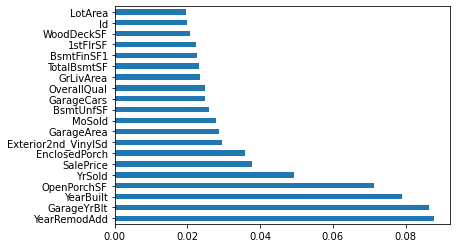

In [ ]:
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

**BEST FEATURS SELECTION(3ND METHOD CORRELATION MATRIX WITH HEATMAP)** **(0 TO 1)**

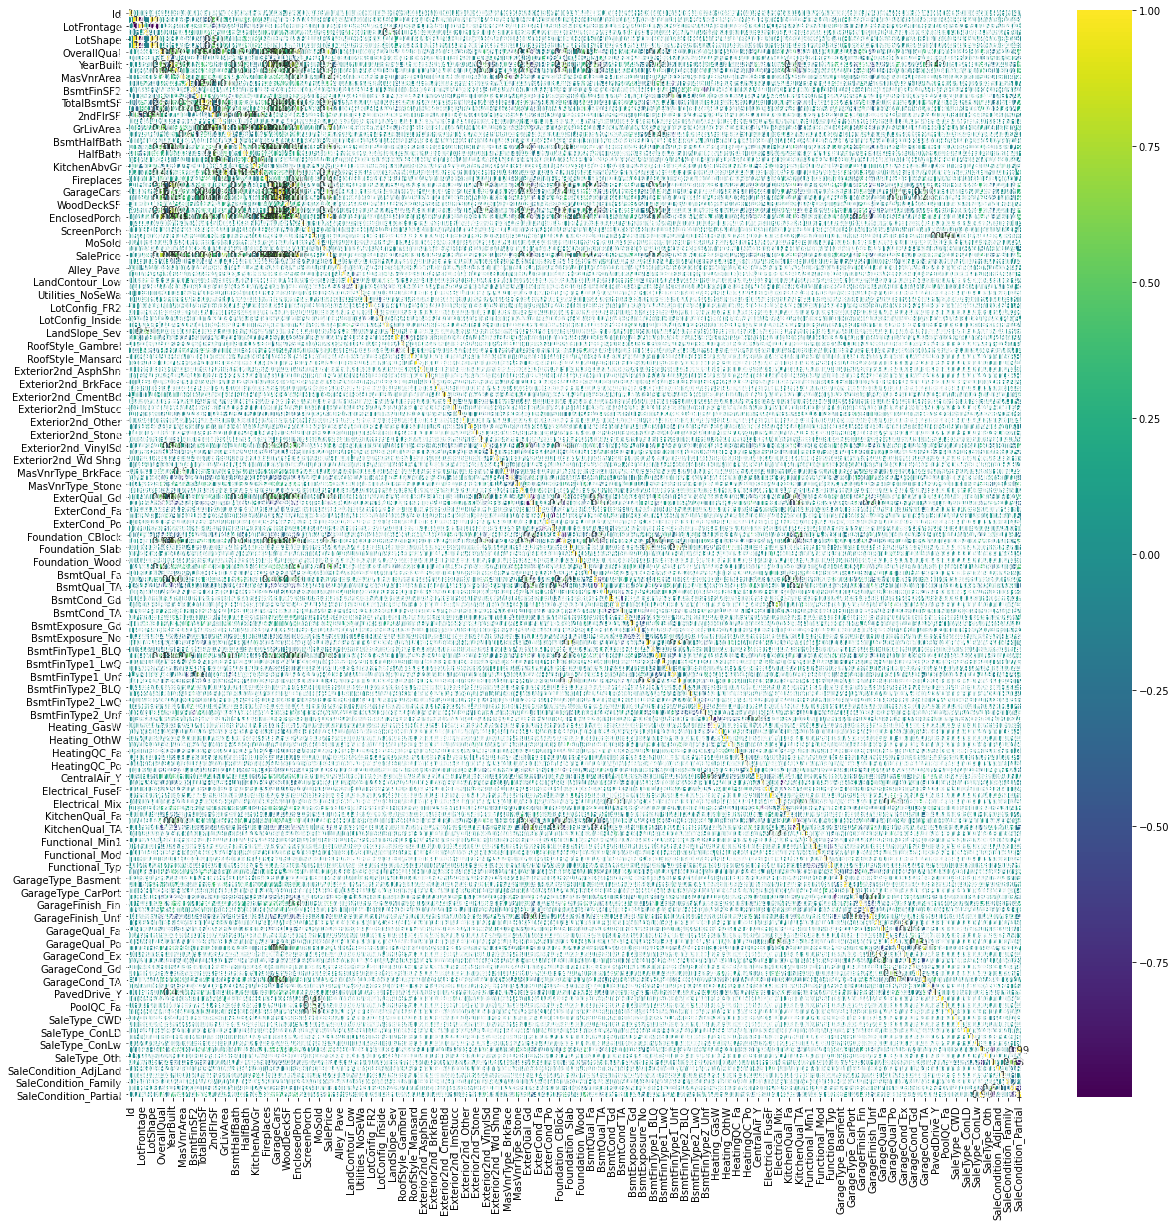

In [ ]:
corrmat = data.corr()
top_features = corrmat.index
plt.figure(figsize =(20,20))
sns.heatmap(data[top_features].corr(),annot=True,cmap='viridis')

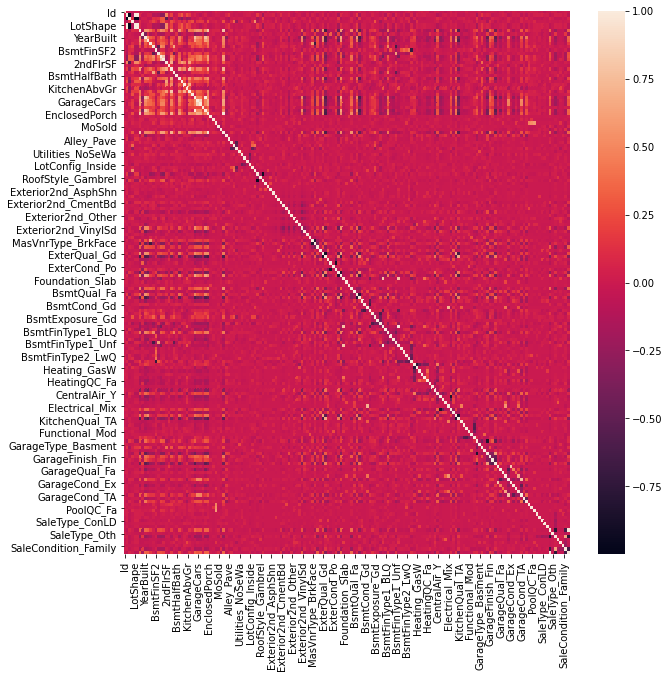

In [ ]:
cormat = data.corr()
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cormat)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =42)

In [ ]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((1095, 72), (365, 72), (1095,), (365,))

***REMOVING HIGHLY CORELATTED WITH EACH COLUMN *** 

In [ ]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr


In [ ]:
corr_features = correlation(x_train,0.85)

In [ ]:
len(set(corr_features))

5

In [ ]:
corr_features 


{'GarageArea', 'LotShape', 'Neighborhood', 'OpenPorchSF', 'SalePrice'}

In [ ]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((1095, 67), (365, 67), (1095,), (365,))

In [ ]:
x_train.shape

(1095, 67)